<a href="https://colab.research.google.com/github/Karanmanolaa/Customer-churn-prediction/blob/main/Customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Details of the features
##### RowNumber—corresponds to the record (row) number and has no effect on the output.
##### CustomerId—contains random values and has no effect on customer leaving the bank.
##### Surname—the surname of a customer has no impact on their decision to leave the bank.
##### CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
##### Geography—a customer’s location can affect their decision to leave the bank.
##### Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
##### Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
##### Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
##### Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
##### NumOfProducts—refers to the number of products that a customer has purchased through the bank.
##### HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
##### IsActiveMember—active customers are less likely to leave the bank.
##### EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
##### Exited—whether or not the customer left the bank.
##### Complain—customer has complaint or not.
##### Satisfaction Score—Score provided by the customer for their complaint resolution.
##### Card Type—type of card hold by the customer.
##### Points Earned—the points earned by the customer for using credit card.

In [ ]:
# Importing Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score

In [ ]:
df = pd.read_csv('/content/Customer_churn.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
df.shape

(10000, 18)

In [ ]:
df['Complain'].value_counts()

0    7956
1    2044
Name: Complain, dtype: int64

In [ ]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [ ]:
# Dropping columns of no use
df.drop(columns=['Surname','RowNumber'], axis=1,inplace=True)

In [ ]:
duplicates = df[df.duplicated('CustomerId', keep=False)]
duplicates

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned


In [ ]:
df.drop(columns=['CustomerId'], axis=1,inplace=True)

In [ ]:
df.dropna(inplace = True)

## Explolatory data analysis

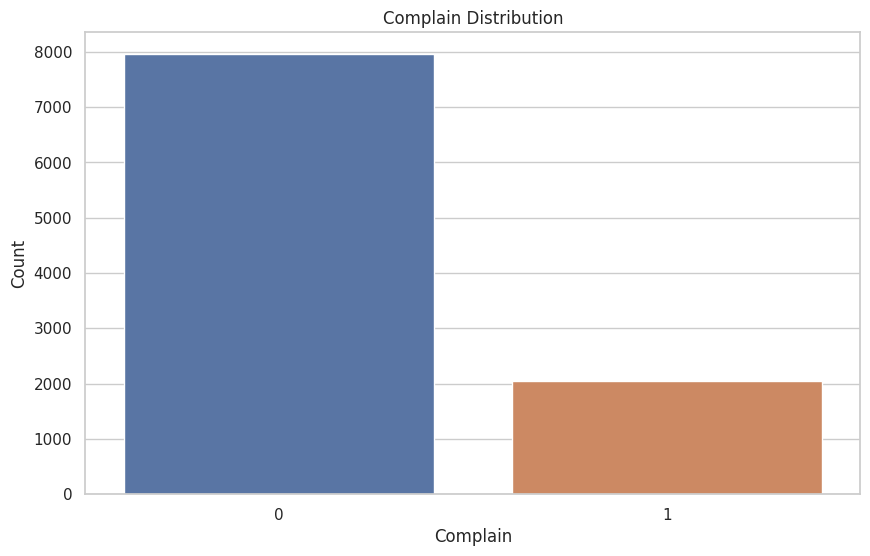

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Complain")
plt.title("Complain Distribution")
plt.xlabel("Complain")
plt.ylabel("Count")
plt.show()

In the dataset, there are a total of 10,000 records. Among these, 2,044 individuals have exited, while 7,956 individuals have chosen to stay. This class distribution highlights the imbalance in the data, with a significantly larger number of individuals staying compared to those who have exited.

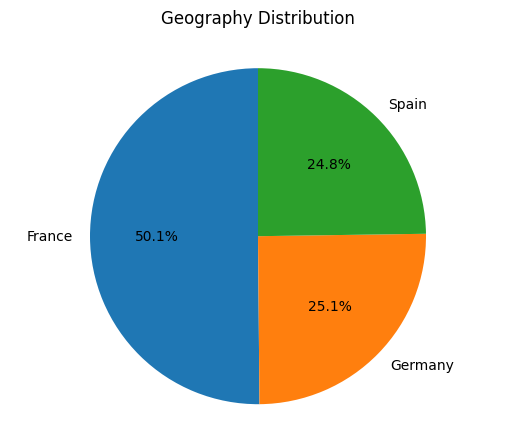

In [ ]:
geography_counts = df['Geography'].value_counts()
plt.pie(geography_counts, labels=geography_counts.index, autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.title("Geography Distribution", pad=20)
plt.show()

In our dataset the information of the people is of 3 Countries .
1. France
2. Germany
3. Spain

<ipython-input-11-7bc2abe7bad2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().round(2)


<Axes: >

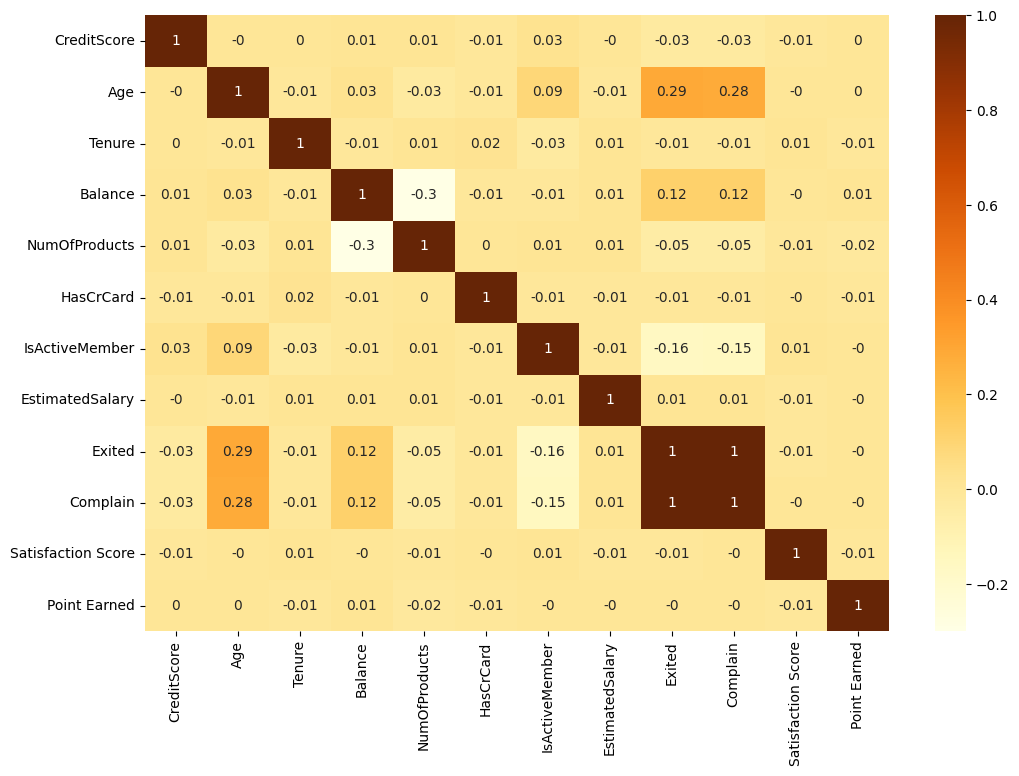

In [ ]:
corr = df.corr().round(2)
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot = True, cmap = 'YlOrBr')

It's evident from our analysis that the 'Complain' column exhibits a very high correlation with another variable. As part of our exploratory data analysis (EDA), we have identified this strong correlation, and we intend to remove the 'Complain' column from our dataset before proceeding with further analysis

In [ ]:
correlation_matrix = df.corr(method='pearson')['Exited']
print(correlation_matrix)

CreditScore          -0.026771
Age                   0.285296
Tenure               -0.013656
Balance               0.118577
NumOfProducts        -0.047611
HasCrCard            -0.006976
IsActiveMember       -0.156356
EstimatedSalary       0.012490
Exited                1.000000
Complain              0.995693
Satisfaction Score   -0.005849
Point Earned         -0.004628
Name: Exited, dtype: float64


<ipython-input-12-32fdc6b89bce>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')['Exited']


In [ ]:
# Complain column is highly corelated
df = df.drop('Complain', axis = 1)

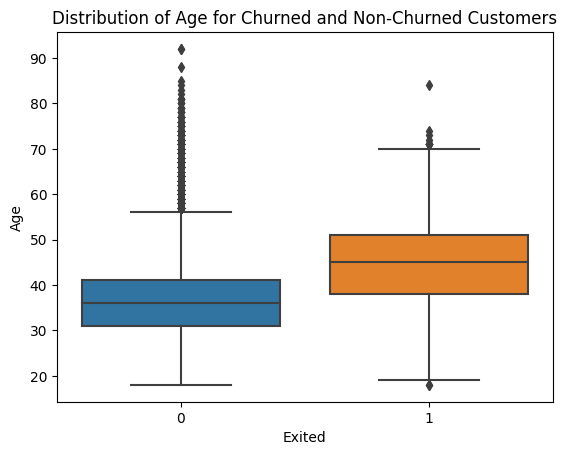

In [ ]:
# Visualizing Age Distribution by Churn
sns.boxplot(x='Exited', y='Age', data=df)
plt.title('Distribution of Age for Churned and Non-Churned Customers')
plt.show()

The majority of customers who exited the bank fell within the age range of approximately 35 to 50

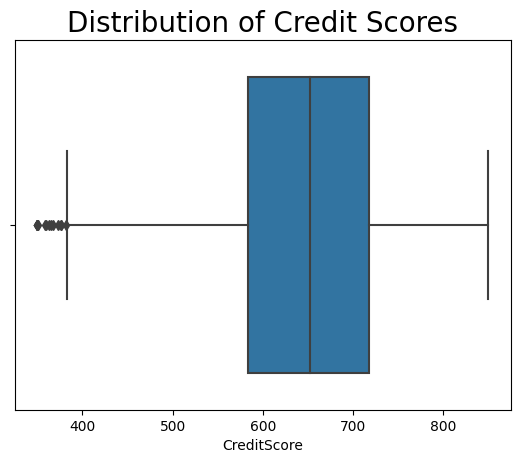

In [ ]:
# CreditScore Distribution Boxplot
plt.title("Distribution of Credit Scores", fontsize=20)
sns.boxplot(x=df["CreditScore"])
plt.show()

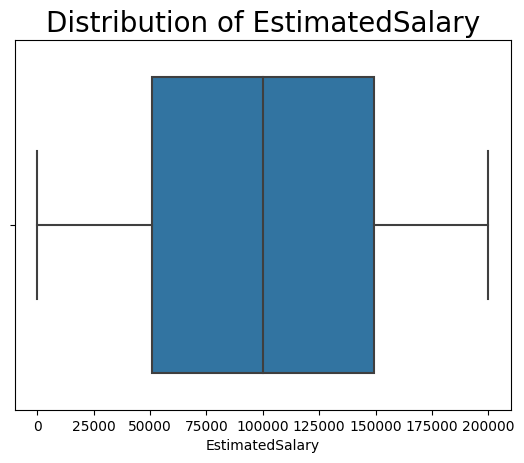

In [ ]:
# Boxplot of EstimatedSalary
plt.title("Distribution of EstimatedSalary", fontsize=20)
sns.boxplot(x=df["EstimatedSalary"])
plt.show()

The estimated salary of the customers is between 50000 to 150000

<Axes: title={'center': 'Variable Card Type'}, xlabel='Card Type', ylabel='count'>

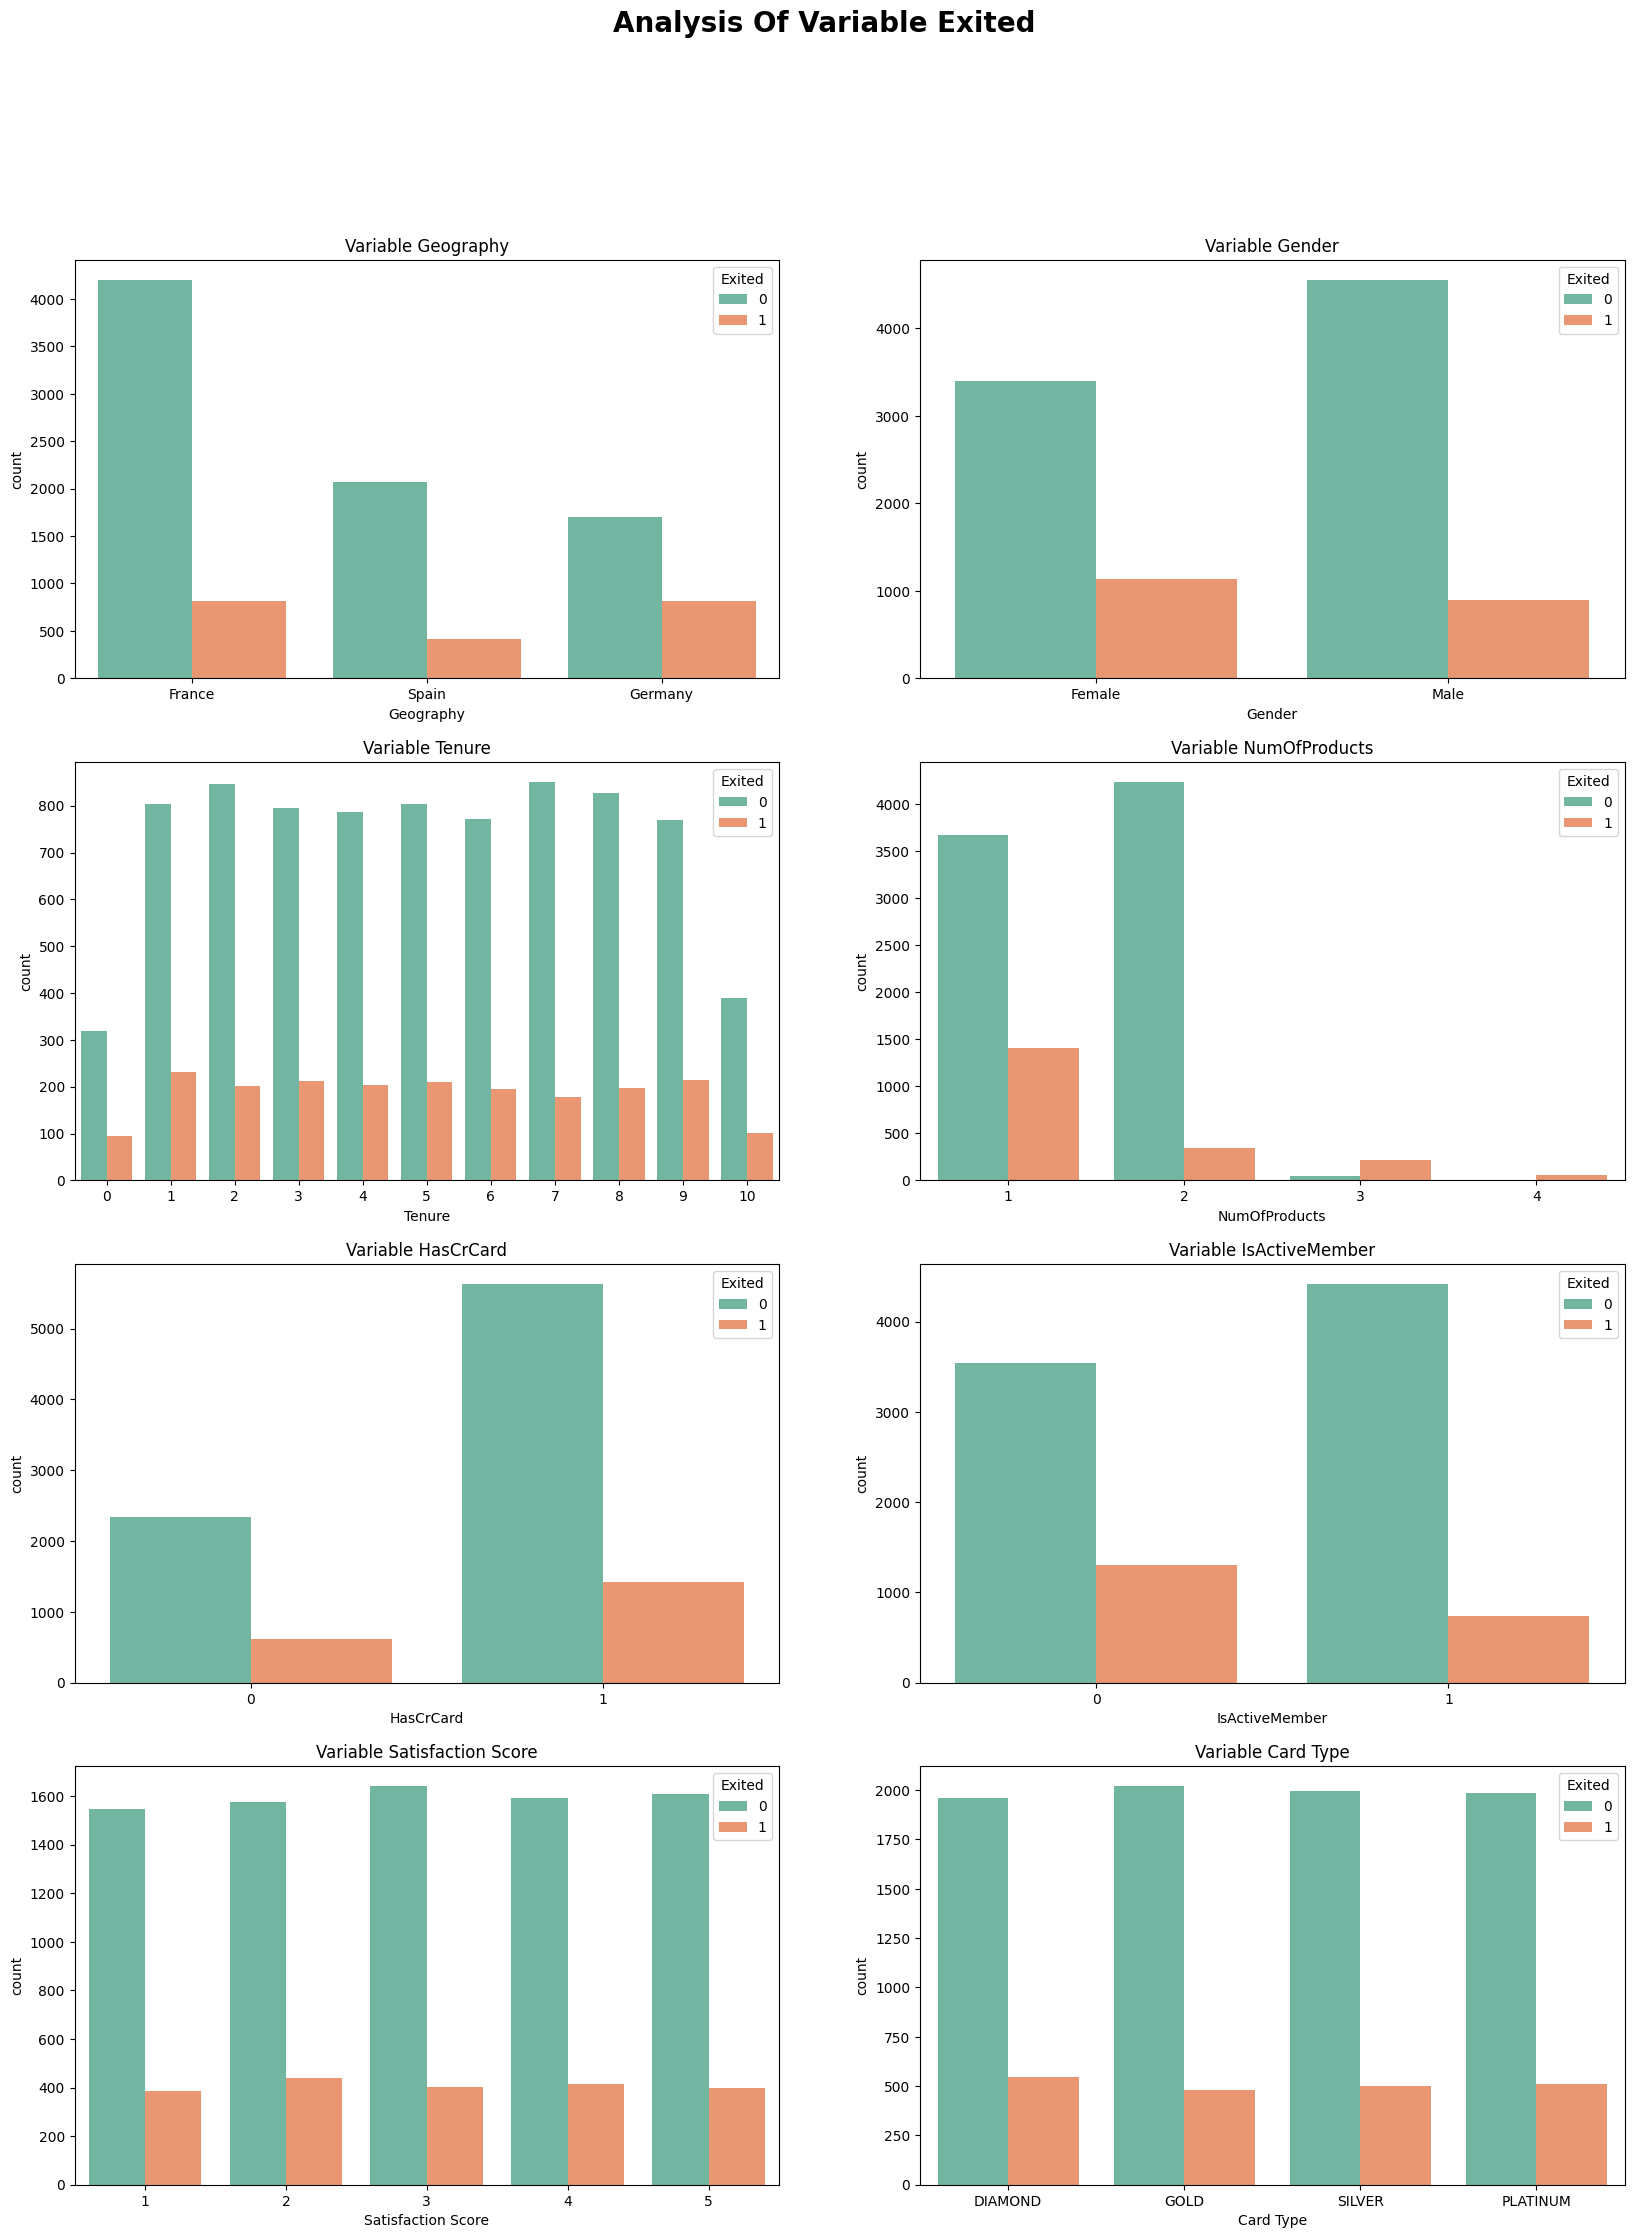

In [ ]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable Exited",fontweight="bold", fontsize=20)

plt.subplot(4, 2, 1)
plt.gca().set_title('Variable Geography')
sns.countplot(x = 'Geography', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 2)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Gender', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 3)
plt.gca().set_title('Variable Tenure')
sns.countplot(x = 'Tenure', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 4)
plt.gca().set_title('Variable NumOfProducts')
sns.countplot(x = 'NumOfProducts', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 5)
plt.gca().set_title('Variable HasCrCard')
sns.countplot(x = 'HasCrCard', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 6)
plt.gca().set_title('Variable IsActiveMember')
sns.countplot(x = 'IsActiveMember', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 7)
plt.gca().set_title('Variable Satisfaction Score')
sns.countplot(x = 'Satisfaction Score', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 8)
plt.gca().set_title('Variable Card Type')
sns.countplot(x = 'Card Type', hue = 'Exited', palette = 'Set2', data = df)

In [ ]:
# Counting the number of customers in each group
df[['Geography', 'Card Type']].groupby(['Geography', 'Card Type']).size().reset_index()

,Geography,Card Type,0
0,France,DIAMOND,1230
1,France,GOLD,1235
2,France,PLATINUM,1264
3,France,SILVER,1285
4,Germany,DIAMOND,648
5,Germany,GOLD,653
6,Germany,PLATINUM,608
7,Germany,SILVER,600
8,Spain,DIAMOND,629
9,Spain,GOLD,614


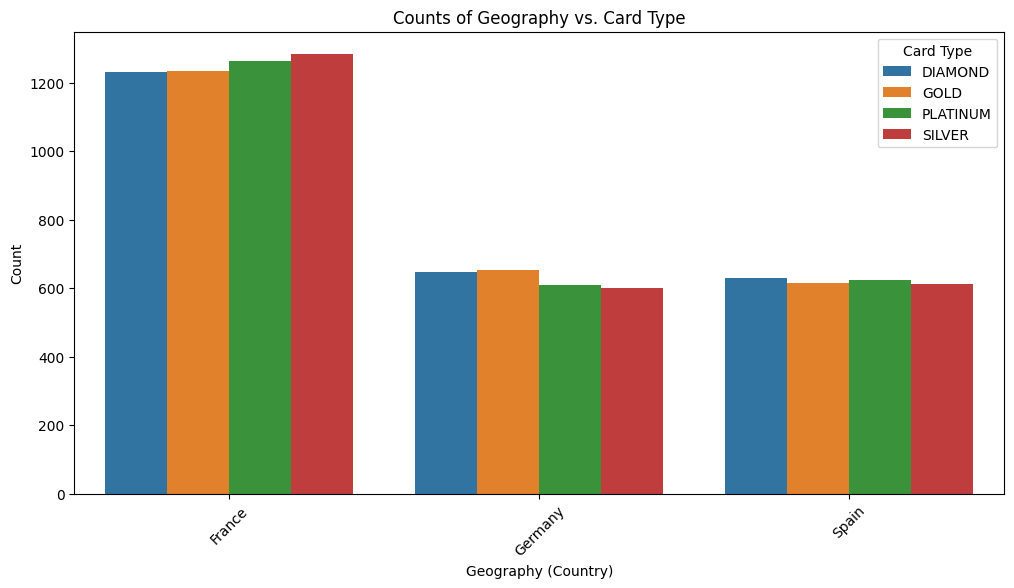

In [ ]:
counts_df = df[['Geography', 'Card Type']].groupby(['Geography', 'Card Type']).size().reset_index()
counts_df.columns = ['Geography', 'Card Type', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='Geography', y='Count', hue='Card Type', data=counts_df)
plt.title('Counts of Geography vs. Card Type')
plt.xlabel('Geography (Country)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Card Type')
plt.show()

This visualization displays the counts of customers categorized by their Geography and Card Type, providing insights into the distribution of customers across different countries and card types. And we can observe that most of the customers are of France

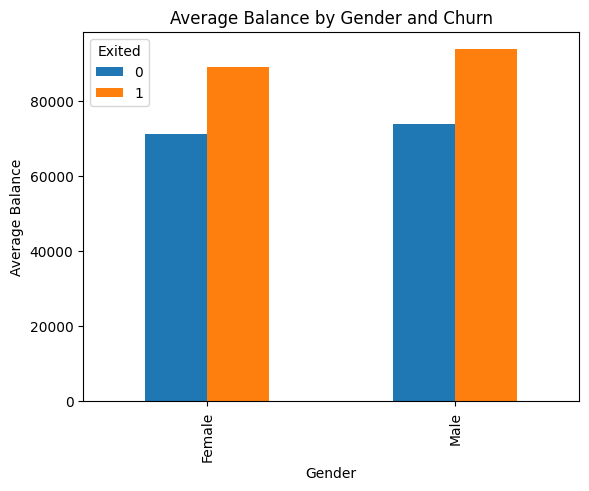

In [ ]:
# Average balance by Gender and Churn
gender_balance_churn = df.groupby(['Gender', 'Exited'])['Balance'].mean().unstack()
gender_balance_churn.plot(kind='bar')
plt.title('Average Balance by Gender and Churn')
plt.ylabel('Average Balance')
plt.show()

In [ ]:
# Making a seperate exited and stayed column for the purpose of data analysis
exit = df["Exited"] == 1

exited = df.where(exit)

exited = exited.sort_values("Balance", ascending = False)
exited = exited.dropna()
exited

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
2092,655.0,Spain,Male,38.0,3.0,250898.09,3.0,0.0,1.0,81054.00,1.0,1.0,SILVER,336.0
3280,583.0,France,Female,57.0,3.0,238387.56,1.0,0.0,1.0,147964.99,1.0,5.0,GOLD,552.0
8733,749.0,Spain,Male,42.0,9.0,222267.63,1.0,0.0,0.0,101108.85,1.0,4.0,GOLD,763.0
6717,663.0,Spain,Female,58.0,5.0,216109.88,1.0,0.0,1.0,74176.71,1.0,2.0,SILVER,251.0
138,584.0,Spain,Female,48.0,2.0,213146.20,1.0,1.0,0.0,75161.25,1.0,4.0,DIAMOND,814.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4222,850.0,France,Male,40.0,6.0,0.00,1.0,1.0,0.0,136985.08,1.0,1.0,DIAMOND,268.0
4224,767.0,Spain,Male,47.0,2.0,0.00,1.0,1.0,0.0,48161.18,1.0,3.0,GOLD,580.0
4260,587.0,France,Male,40.0,2.0,0.00,4.0,0.0,1.0,106174.70,1.0,2.0,PLATINUM,826.0
4266,536.0,France,Female,35.0,8.0,0.00,1.0,1.0,0.0,171840.24,1.0,1.0,SILVER,418.0


In [ ]:
stay = df["Exited"] == 0

stayed = df.where(stay)

stayed = stayed.sort_values("Balance", ascending = False)
stayed = stayed.dropna()
stayed

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
3588,489.0,Spain,Male,40.0,3.0,221532.80,1.0,1.0,0.0,171867.08,0.0,5.0,DIAMOND,636.0
1067,650.0,Germany,Male,26.0,4.0,214346.96,2.0,1.0,0.0,128815.33,0.0,2.0,GOLD,888.0
1533,850.0,France,Female,37.0,3.0,212778.20,1.0,0.0,1.0,69372.88,0.0,2.0,SILVER,661.0
3920,634.0,Germany,Male,43.0,3.0,212696.32,1.0,1.0,0.0,115268.86,0.0,3.0,PLATINUM,327.0
2709,592.0,France,Male,37.0,4.0,212692.97,1.0,0.0,0.0,176395.02,0.0,1.0,GOLD,232.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7042,544.0,France,Male,44.0,1.0,0.00,2.0,0.0,0.0,69244.24,0.0,2.0,GOLD,926.0
3470,649.0,France,Female,36.0,2.0,0.00,2.0,0.0,1.0,75035.48,0.0,3.0,SILVER,984.0
7044,678.0,France,Male,26.0,3.0,0.00,2.0,1.0,0.0,4989.33,0.0,4.0,SILVER,694.0
7045,850.0,France,Female,36.0,6.0,0.00,2.0,1.0,1.0,190194.95,0.0,1.0,GOLD,978.0


In [ ]:
stayed['Satisfaction Score'].value_counts()

3.0    1641
5.0    1607
4.0    1594
2.0    1575
1.0    1545
Name: Satisfaction Score, dtype: int64

Customers who closed their count had a much lower satisfaction score

In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
exited['Geography'].value_counts()

Germany    814
France     811
Spain      413
Name: Geography, dtype: int64

In [ ]:
stayed['Geography'].value_counts()

France     4203
Spain      2064
Germany    1695
Name: Geography, dtype: int64

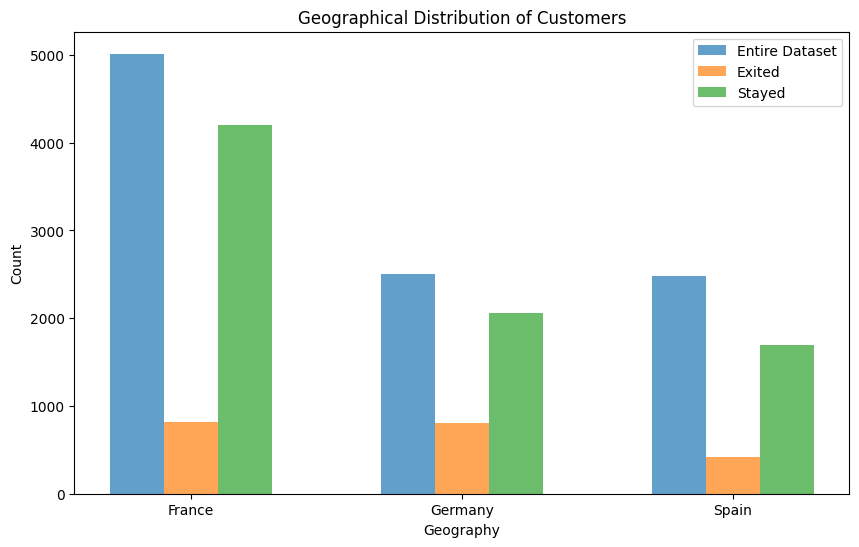

In [ ]:
all_counts = df['Geography'].value_counts()

exited_counts = exited['Geography'].value_counts()
stayed_counts = stayed['Geography'].value_counts()

locations = all_counts.index

bar_width = 0.2

x = np.arange(len(locations))

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width, all_counts, bar_width, label='Entire Dataset', alpha=0.7)
plt.bar(x, exited_counts, bar_width, label='Exited', alpha=0.7)
plt.bar(x + bar_width, stayed_counts, bar_width, label='Stayed', alpha=0.7)

plt.xlabel('Geography')
plt.ylabel('Count')
plt.title('Geographical Distribution of Customers')
plt.xticks(x, locations)
plt.legend()
plt.show()

While the majority of our customer base is located in France, it's noteworthy that a significant number of account closures have occurred in Germany.

In [ ]:
stayed['NumOfProducts'].value_counts()

2.0    4241
1.0    3675
3.0      46
Name: NumOfProducts, dtype: int64

In [ ]:
exited['NumOfProducts'].value_counts()


1.0    1409
2.0     349
3.0     220
4.0      60
Name: NumOfProducts, dtype: int64

It appears the more products a customer has the more likely they are to stay

In [ ]:
stayed['HasCrCard'].value_counts()

1.0    5630
0.0    2332
Name: HasCrCard, dtype: int64

In [ ]:
exited['HasCrCard'].value_counts()

1.0    1425
0.0     613
Name: HasCrCard, dtype: int64

Customers that closed their account had a higher percentage of credit cards

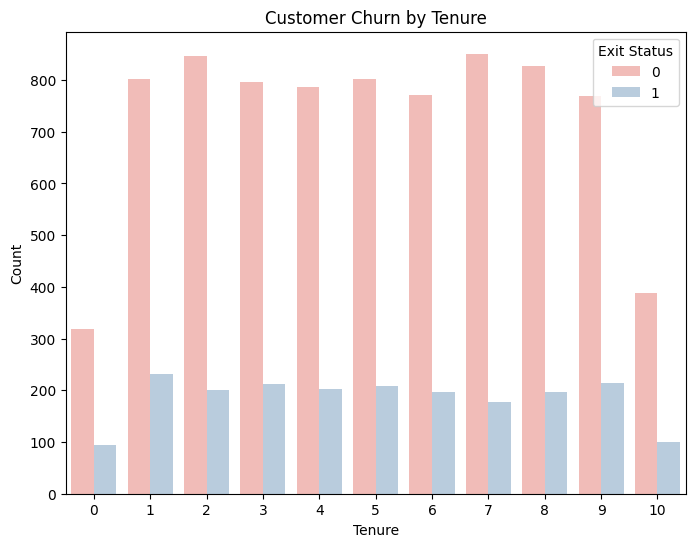

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Tenure', hue='Exited', palette='Pastel1', data=df)

plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Customer Churn by Tenure')
plt.legend(title='Exit Status', loc='upper right')
plt.xticks(rotation=0)
plt.show()

## Converting the categorical columns to numerical one

In [ ]:
label_encoder=LabelEncoder()
df['Geography']=label_encoder.fit_transform(df['Geography'])
df['Gender']=label_encoder.fit_transform(df['Gender'])
df['Card Type']=label_encoder.fit_transform(df['Card Type'])

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,2,0,464
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,3,0,456
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,3,0,377
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,5,1,350
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,5,1,425


In [ ]:
# Seperating independent and dependent features
X = df.drop(['Exited'],axis=1)

y = df['Exited']

In [ ]:
# Train test split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((8000, 13), (2000, 13), (8000,), (2000,))

# **Model Training**

Applying standard Scaler

In [ ]:
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

## Logistic Regression

In [ ]:
LR = LogisticRegression(max_iter=1000)

In [ ]:
LR.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
train_pred = LR.predict(X_train)

In [ ]:
train_accuracy = accuracy_score(y_train, train_pred)
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))

Training Accuracy: 79.04%


#### Making Predictions on test data

In [ ]:
y_test_pred = LR.predict(X_test)

In [ ]:
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Test Accuracy: 78.35%


## Decision Tree

In [ ]:
DT = DecisionTreeClassifier(max_depth=5)

In [ ]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
DT_pred= DT.predict(X_train)

In [ ]:
DT_accuracy = accuracy_score(y_train,DT_pred)
print("Training Accuracy: {:.2f}%".format(DT_accuracy * 100))

Training Accuracy: 85.99%


### Making Predictions on Test Data

In [ ]:
DT_test_pred = DT.predict(X_test)

In [ ]:
DT_test_accuracy = accuracy_score(y_test,DT_test_pred)
print("Testing Accuracy: {:.2f}%".format(DT_test_accuracy * 100))

Testing Accuracy: 84.85%


## Hyperparameter Tuning

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Defining classifiers and their respective hyperparameters grids
classifiers = {
    'KNN': {
        'classifier': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
        }
    },
    'XGBoost': {
        'classifier': XGBClassifier(),
        'param_grid': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
        }
    },
    'Decision Tree': {
        'classifier': DecisionTreeClassifier(),
        'param_grid': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
        }
    },
    'Random Forest': {
        'classifier': RandomForestClassifier(),
        'param_grid': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
        }
    }
}

# Performing hyperparameter tuning for each classifier
for classifier_name, config in classifiers.items():
    classifier = config['classifier']
    param_grid = config['param_grid']

    # Initialize GridSearchCV
    grid_search = GridSearchCV(
        estimator=classifier,
        param_grid=param_grid,
        scoring='accuracy',
        cv=5,
        n_jobs=-1
    )

    # Fit the grid search to your training data
    grid_search.fit(X_train, y_train)

    # Retrieve best hyperparameters, best estimator, and best score
    best_params = grid_search.best_params_
    best_classifier = grid_search.best_estimator_
    best_score = grid_search.best_score_

    # Make predictions and evaluate on test data
    y_pred = best_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Print results for each classifier
    print(f"{classifier_name} Best Parameters: {best_params}")
    print(f"{classifier_name} Best Score: {best_score:.2f}")
    print(f"{classifier_name} Testing Accuracy: {accuracy * 100:.2f}%")
    print("-" * 40)


KNN Best Parameters: {'n_neighbors': 7, 'weights': 'uniform'}
KNN Best Score: 0.78
KNN Testing Accuracy: 76.73%
----------------------------------------
XGBoost Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
XGBoost Best Score: 0.86
XGBoost Testing Accuracy: 85.60%
----------------------------------------
Decision Tree Best Parameters: {'max_depth': 10, 'min_samples_split': 10}
Decision Tree Best Score: 0.83
Decision Tree Testing Accuracy: 83.33%
----------------------------------------
Random Forest Best Parameters: {'max_depth': 30, 'n_estimators': 300}
Random Forest Best Score: 0.86
Random Forest Testing Accuracy: 85.43%
----------------------------------------


In [ ]:
from sklearn.metrics import classification_report

best_classifier.fit(X_train, y_train)
y_pred = best_classifier.predict(X_test)

# Print the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      2380
           1       0.75      0.45      0.57       620

    accuracy                           0.86      3000
   macro avg       0.81      0.71      0.74      3000
weighted avg       0.85      0.86      0.84      3000



In [ ]:
print(f"Classification Report for {classifier_name}:\n", class_report)

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      2380
           1       0.75      0.45      0.57       620

    accuracy                           0.86      3000
   macro avg       0.81      0.71      0.74      3000
weighted avg       0.85      0.86      0.84      3000



#### Thank You